In [3]:
!pip3 install imblearn
!pip3 install mlxtend
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score,log_loss, confusion_matrix, precision_score, recall_score, accuracy_score 
from sklearn import linear_model, ensemble , tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
import imblearn.over_sampling
from sklearn.svm import SVC  
from sklearn.utils import class_weight
import statsmodels.api as sm
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline, make_pipeline 
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics

     |████████████████████████████████| 1.3 MB 29.8 MB/s            


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Bank%20Loan%20Status%20Dataset/credit_train.csv")
df

Loan ID 
 Customer ID 
 Loan Status 
 Current Loan Amount 
 Term 
 Credit Score 
 Annual Income 
 Years in current job 
 Home Ownership 
 Purpose 
 Monthly Debt 
 Years of Credit History 
 Months since last delinquent 
 Number of Open Accounts 
 Number of Credit Problems 
 Current Credit Balance 
 Maximum Open Credit 
 Bankruptcies 
 Tax Liens 
 
 
 
 
 0 
 14dd8831-6af5-400b-83ec-68e61888a048 
 981165ec-3274-42f5-a3b4-d104041a9ca9 
 Fully Paid 
 445412.0 
 Short Term 
 709.0 
 1167493.0 
 8 years 
 Home Mortgage 
 Home Improvements 
 5214.74 
 17.2 
 NaN 
 6.0 
 1.0 
 228190.0 
 416746.0 
 1.0 
 0.0 
 
 
 1 
 4771cc26-131a-45db-b5aa-537ea4ba5342 
 2de017a3-2e01-49cb-a581-08169e83be29 
 Fully Paid 
 262328.0 
 Short Term 
 NaN 
 NaN 
 10+ years 
 Home Mortgage 
 Debt Consolidation 
 33295.98 
 21.1 
 8.0 
 35.0 
 0.0 
 229976.0 
 850784.0 
 0.0 
 0.0 
 
 
 2 
 4eed4e6a-aa2f-4c91-8651-ce984ee8fb26 
 5efb2b2b-bf11-4dfd-a572-3761a2694725 
 Fully Paid 
 99999999.0 
 Short Term 
 741.0 
 2231892.0 
 8 years 
 Own Home 
 Debt Consolidation 
 29200.53 
 14.9 
 29.0 
 18.0 
 1.0 
 297996.0 
 750090.0 
 0.0 
 0.0 
 
 
 3 
 77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a 
 e777faab-98ae-45af-9a86-7ce5b33b1011 
 Fully Paid 
 347666.0 
 Long Term 
 721.0 
 806949.0 
 3 years 
 Own Home 
 Debt Consolidation 
 8741.90 
 12.0 
 NaN 
 9.0 
 0.0 
 256329.0 
 386958.0 
 0.0 
 0.0 
 
 
 4 
 d4062e70-befa-4995-8643-a0de73938182 
 81536ad9-5ccf-4eb8-befb-47a4d608658e 
 Fully Paid 
 176220.0 
 Short Term 
 NaN 
 NaN 
 5 years 
 Rent 
 Debt Consolidation 
 20639.70 
 6.1 
 NaN 
 15.0 
 0.0 
 253460.0 
 427174.0 
 0.0 
 0.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 100509 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 100510 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 100511 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 100512 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 100513 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 
 100514 rows × 19 columns

In [6]:
df.shape

(100514, 19)

In [7]:
df.tail()

Loan ID 
 Customer ID 
 Loan Status 
 Current Loan Amount 
 Term 
 Credit Score 
 Annual Income 
 Years in current job 
 Home Ownership 
 Purpose 
 Monthly Debt 
 Years of Credit History 
 Months since last delinquent 
 Number of Open Accounts 
 Number of Credit Problems 
 Current Credit Balance 
 Maximum Open Credit 
 Bankruptcies 
 Tax Liens 
 
 
 
 
 100509 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 100510 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 100511 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 100512 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 100513 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN

In [8]:
df.isna().sum()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [13]:
duplicate = df.duplicated()
print(f"duplicate in df :", duplicate.sum())

duplicate in df : 10728


In [14]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [15]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [16]:
df_train, df_test  = train_test_split(df, test_size=0.2, random_state=42)
print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (80411, 19)
Shape of test: (20103, 19)


In [17]:
df_train = df_train.reset_index(drop=True)

df_test = df_test.reset_index(drop=True)

df_train = df_train.dropna(subset = ['Loan_ID'])

# for test
df_test = df_test.dropna(subset = ['Loan_ID'])
print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (79992, 19)
Shape of test: (20008, 19)


In [18]:
df_train.sample(20)

Loan_ID 
 Customer_ID 
 Loan_Status 
 Current_Loan_Amount 
 Term 
 Credit_Score 
 Annual_Income 
 Years_in_current_job 
 Home_Ownership 
 Purpose 
 Monthly_Debt 
 Years_of_Credit_History 
 Months_since_last_delinquent 
 Number_of_Open_Accounts 
 Number_of_Credit_Problems 
 Current_Credit_Balance 
 Maximum_Open_Credit 
 Bankruptcies 
 Tax_Liens 
 
 
 
 
 36838 
 f0915e25-13ed-40ed-b80f-12aeb7e32151 
 5b129568-f18f-41fe-9da3-8baff15e5ddb 
 Fully Paid 
 208516.0 
 Short Term 
 744.0 
 937935.0 
 5 years 
 Rent 
 Debt Consolidation 
 2923.15 
 10.9 
 NaN 
 10.0 
 0.0 
 122987.0 
 588434.0 
 0.0 
 0.0 
 
 
 38918 
 6f43243d-b014-4b88-9752-a5a72091bc41 
 d2addc3d-ac29-4195-a6c6-572efb6597c3 
 Charged Off 
 261360.0 
 Long Term 
 NaN 
 NaN 
 6 years 
 Rent 
 Debt Consolidation 
 8464.50 
 16.0 
 41.0 
 11.0 
 0.0 
 270199.0 
 383416.0 
 0.0 
 0.0 
 
 
 75314 
 4a0b7616-6e56-42f4-a3fc-9d0b3ef9bb9e 
 e06873ce-eea8-46f9-a8d9-2bdf67a0340a 
 Charged Off 
 562870.0 
 Long Term 
 6820.0 
 2177799.0 
 10+ years 
 Home Mortgage 
 Debt Consolidation 
 32303.99 
 29.1 
 NaN 
 9.0 
 0.0 
 331360.0 
 661518.0 
 0.0 
 0.0 
 
 
 5319 
 557b004a-f52f-4280-a1e1-85ca8c1d1b36 
 ccfa0453-00b0-431a-84bc-1d699c7904cf 
 Charged Off 
 350614.0 
 Long Term 
 693.0 
 928587.0 
 9 years 
 Home Mortgage 
 Debt Consolidation 
 14625.44 
 12.2 
 NaN 
 16.0 
 0.0 
 205257.0 
 440132.0 
 0.0 
 0.0 
 
 
 20266 
 e2e94d42-1f75-47a1-a989-559841f35279 
 fd29cc65-407a-4d5f-bc9c-de1ef8218f72 
 Fully Paid 
 368852.0 
 Short Term 
 726.0 
 2465060.0 
 1 year 
 Rent 
 Debt Consolidation 
 46630.75 
 22.4 
 17.0 
 17.0 
 0.0 
 709042.0 
 1049862.0 
 0.0 
 0.0 
 
 
 36002 
 9f74ec32-1153-48ce-b4b6-3ed41e751a67 
 8e5f88f0-3c1b-4ac4-a0e1-5f227777f85d 
 Fully Paid 
 355520.0 
 Long Term 
 735.0 
 1343300.0 
 < 1 year 
 Home Mortgage 
 Debt Consolidation 
 18246.46 
 14.6 
 NaN 
 15.0 
 0.0 
 376124.0 
 564146.0 
 0.0 
 0.0 
 
 
 71826 
 4e57ef97-71d6-434f-8fbe-53966374dc25 
 506405eb-5e33-4b11-a496-7e9e9c4b8f53 
 Fully Paid 
 130394.0 
 Short Term 
 745.0 
 2064502.0 
 6 years 
 Rent 
 Debt Consolidation 
 28386.95 
 16.8 
 21.0 
 13.0 
 0.0 
 571767.0 
 784432.0 
 0.0 
 0.0 
 
 
 36853 
 e57bfcf2-36c0-4dce-8f98-a713f3aaa857 
 b99eef87-5050-47c3-bc39-21139497d8bc 
 Fully Paid 
 397672.0 
 Short Term 
 740.0 
 1240187.0 
 5 years 
 Home Mortgage 
 Debt Consolidation 
 21289.88 
 16.8 
 NaN 
 7.0 
 0.0 
 190494.0 
 249502.0 
 0.0 
 0.0 
 
 
 11403 
 14e5360c-ce05-490f-a28f-01f34f365787 
 efa03f25-8658-4849-97d3-e0398bc70872 
 Charged Off 
 621368.0 
 Long Term 
 728.0 
 2127354.0 
 10+ years 
 Home Mortgage 
 Debt Consolidation 
 39533.30 
 24.0 
 NaN 
 16.0 
 0.0 
 637431.0 
 1424874.0 
 0.0 
 0.0 
 
 
 41566 
 a5728d43-fadf-490c-af66-a91bf3a7855e 
 1621723a-1efb-4204-b69c-0a58823bf6af 
 Fully Paid 
 309452.0 
 Short Term 
 NaN 
 NaN 
 3 years 
 Home Mortgage 
 Debt Consolidation 
 33072.16 
 26.7 
 NaN 
 10.0 
 0.0 
 1031111.0 
 1814472.0 
 0.0 
 0.0 
 
 
 29545 
 3fc618b3-9e20-44a5-b4bd-16f3c6b12b5f 
 360b443f-9558-45f3-851f-9eb785bccb70 
 Fully Paid 
 393316.0 
 Long Term 
 712.0 
 981274.0 
 2 years 
 Home Mortgage 
 Debt Consolidation 
 20688.53 
 23.8 
 10.0 
 18.0 
 0.0 
 280440.0 
 682198.0 
 0.0 
 0.0 
 
 
 60386 
 f1b849de-e795-4a97-bcaa-c1d74c8ff797 
 055dfea3-1b5b-4673-a5aa-9796304d8e15 
 Fully Paid 
 241560.0 
 Short Term 
 701.0 
 948290.0 
 7 years 
 Home Mortgage 
 Other 
 12098.63 
 15.1 
 11.0 
 7.0 
 0.0 
 224409.0 
 305338.0 
 0.0 
 0.0 
 
 
 19561 
 23663a40-30d6-4d11-9026-0eb91c1398b3 
 8ac16875-4df4-4c11-8c3e-74c5990e4231 
 Fully Paid 
 99999999.0 
 Long Term 
 722.0 
 495729.0 
 2 years 
 Rent 
 Buy a Car 
 10658.24 
 27.9 
 NaN 
 13.0 
 0.0 
 121315.0 
 295746.0 
 0.0 
 0.0 
 
 
 20370 
 a96c58bd-0c38-4f9e-ab75-c3c905ca2d2b 
 9672dcb9-e095-4b1a-be65-bb68c963cb03 
 Fully Paid 
 99999999.0 
 Long Term 
 733.0 
 2987940.0 
 2 years 
 Home Mortgage 
 Buy a Car 
 20168.50 
 26.1 
 NaN 
 9.0 
 0.0 
 661979.0 
 1851476.0 
 0.0 
 0.0 
 
 
 49894 
 98762d97-2ac0-4

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79992 entries, 0 to 80410
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       79992 non-null  object 
 1   Customer_ID                   79992 non-null  object 
 2   Loan_Status                   79992 non-null  object 
 3   Current_Loan_Amount           79992 non-null  float64
 4   Term                          79992 non-null  object 
 5   Credit_Score                  64536 non-null  float64
 6   Annual_Income                 64536 non-null  float64
 7   Years_in_current_job          76606 non-null  object 
 8   Home_Ownership                79992 non-null  object 
 9   Purpose                       79992 non-null  object 
 10  Monthly_Debt                  79992 non-null  float64
 11  Years_of_Credit_History       79992 non-null  float64
 12  Months_since_last_delinquent  37455 non-null  float64
 13  N

In [20]:
df_train.isna().sum()

In [22]:
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 6520
Duplicate in test : 401
Shape of train: (79992, 19)
Shape of test: (20008, 19)


In [23]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [24]:
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 0
Duplicate in test : 0
Shape of train: (73472, 19)
Shape of test: (19607, 19)


In [25]:
df_train['Loan_ID'].value_counts().sort_values(ascending=False)

In [26]:
df_train[df_train.Loan_ID.duplicated()]

Loan_ID 
 Customer_ID 
 Loan_Status 
 Current_Loan_Amount 
 Term 
 Credit_Score 
 Annual_Income 
 Years_in_current_job 
 Home_Ownership 
 Purpose 
 Monthly_Debt 
 Years_of_Credit_History 
 Months_since_last_delinquent 
 Number_of_Open_Accounts 
 Number_of_Credit_Problems 
 Current_Credit_Balance 
 Maximum_Open_Credit 
 Bankruptcies 
 Tax_Liens 
 
 
 
 
 616 
 ccb4bff4-4103-4220-bd6a-7cf8d97660f2 
 f7ad2ea9-c1a2-4020-8db9-d1ce98dd9cac 
 Fully Paid 
 215512.0 
 Short Term 
 716.0 
 1302868.0 
 7 years 
 Rent 
 Debt Consolidation 
 5830.34 
 13.8 
 NaN 
 6.0 
 0.0 
 84284.0 
 325270.0 
 0.0 
 0.0 
 
 
 625 
 cb1970cb-57d1-4d98-9889-c95b36e4c72a 
 9a4fded3-a8a1-42e2-b10e-31ce3925e444 
 Fully Paid 
 357808.0 
 Long Term 
 671.0 
 1158810.0 
 2 years 
 Home Mortgage 
 Debt Consolidation 
 29260.00 
 12.5 
 1.0 
 27.0 
 0.0 
 331759.0 
 1401994.0 
 0.0 
 0.0 
 
 
 981 
 6c36c90c-da96-42cf-b46d-81f50ec470f3 
 8a4d6d5b-69e0-4bde-afb2-cc1d3e8b831f 
 Fully Paid 
 456786.0 
 Long Term 
 700.0 
 1327606.0 
 1 year 
 Rent 
 Debt Consolidation 
 3186.30 
 15.2 
 51.0 
 5.0 
 0.0 
 105355.0 
 153626.0 
 0.0 
 0.0 
 
 
 1047 
 58d48443-93b1-4443-bd65-3ecd0fbbf9f7 
 d5d43933-bf2d-4b95-87e9-7b743568b618 
 Fully Paid 
 543290.0 
 Long Term 
 699.0 
 1370071.0 
 10+ years 
 Rent 
 Debt Consolidation 
 11017.72 
 14.1 
 NaN 
 8.0 
 0.0 
 340404.0 
 532620.0 
 0.0 
 0.0 
 
 
 1131 
 f001953b-a5e1-4668-8fc1-d8df1a9e72c0 
 702e5fcc-00bf-4722-8f3e-9b16b211e8de 
 Fully Paid 
 99999999.0 
 Long Term 
 688.0 
 674975.0 
 5 years 
 Rent 
 Business Loan 
 5495.37 
 14.7 
 45.0 
 12.0 
 0.0 
 157453.0 
 415316.0 
 0.0 
 0.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 80372 
 abfdae7a-3bda-42db-ba79-4b9c059764bb 
 0a6c36c7-001d-4d98-9f35-26e0365228fa 
 Fully Paid 
 429088.0 
 Long Term 
 NaN 
 NaN 
 10+ years 
 Home Mortgage 
 Debt Consolidation 
 27129.34 
 12.3 
 NaN 
 13.0 
 0.0 
 351329.0 
 605352.0 
 0.0 
 0.0 
 
 
 80376 
 f35b054f-30c1-4e13-af01-685db773770f 
 3a42402c-3996-4021-a935-185eb1754fb1 
 Fully Paid 
 207086.0 
 Short Term 
 723.0 
 1645457.0 
 10+ years 
 Rent 
 other 
 34143.00 
 19.8 
 10.0 
 11.0 
 0.0 
 232218.0 
 321244.0 
 0.0 
 0.0 
 
 
 80378 
 47f27c67-3199-4aa4-a700-826e4a4b922c 
 d2b60744-df1a-4e25-a2f0-5ae12e6d31aa 
 Fully Paid 
 546260.0 
 Long Term 
 725.0 
 1698372.0 
 10+ years 
 Rent 
 Debt Consolidation 
 21512.75 
 17.5 
 12.0 
 19.0 
 0.0 
 88787.0 
 1606352.0 
 0.0 
 0.0 
 
 
 80389 
 5f51b043-e1cb-4022-8085-1aed0142d5f0 
 8a187950-2cc1-470b-852e-d32e13cb49af 
 Fully Paid 
 99242.0 
 Short Term 
 703.0 
 666596.0 
 3 years 
 Own Home 
 Debt Consolidation 
 9110.12 
 9.1 
 18.0 
 9.0 
 0.0 
 126882.0 
 282546.0 
 0.0 
 0.0 
 
 
 80391 
 171fa398-bd51-468a-bb13-78899d101527 
 28e63dd2-762a-4b6a-b931-d77131e8347b 
 Fully Paid 
 774862.0 
 Long Term 
 691.0 
 2781923.0 
 10+ years 
 Home Mortgage 
 Debt Consolidation 
 66302.40 
 23.2 
 5.0 
 21.0 
 0.0 
 2088670.0 
 2963796.0 
 0.0 
 0.0 
 
 
 
 4994 rows × 19 columns

In [27]:
df_train[df_train['Loan_ID'] == '7830a00a-20c4-4480-9cf0-fe2f86b5266b']

Loan_ID 
 Customer_ID 
 Loan_Status 
 Current_Loan_Amount 
 Term 
 Credit_Score 
 Annual_Income 
 Years_in_current_job 
 Home_Ownership 
 Purpose 
 Monthly_Debt 
 Years_of_Credit_History 
 Months_since_last_delinquent 
 Number_of_Open_Accounts 
 Number_of_Credit_Problems 
 Current_Credit_Balance 
 Maximum_Open_Credit 
 Bankruptcies 
 Tax_Liens 
 
 
 
 
 31727 
 7830a00a-20c4-4480-9cf0-fe2f86b5266b 
 f41798de-03d5-4c73-aa4d-1483774aa739 
 Fully Paid 
 99999999.0 
 Short Term 
 653.0 
 1314572.0 
 4 years 
 Rent 
 Debt Consolidation 
 13145.72 
 7.2 
 NaN 
 9.0 
 0.0 
 217132.0 
 323158.0 
 0.0 
 0.0

In [28]:
df_train[df_train['Loan_ID'] == '5a90cbe3-8fee-4582-8823-1f31546dec6e']

Loan_ID 
 Customer_ID 
 Loan_Status 
 Current_Loan_Amount 
 Term 
 Credit_Score 
 Annual_Income 
 Years_in_current_job 
 Home_Ownership 
 Purpose 
 Monthly_Debt 
 Years_of_Credit_History 
 Months_since_last_delinquent 
 Number_of_Open_Accounts 
 Number_of_Credit_Problems 
 Current_Credit_Balance 
 Maximum_Open_Credit 
 Bankruptcies 
 Tax_Liens 
 
 
 
 
 55542 
 5a90cbe3-8fee-4582-8823-1f31546dec6e 
 f4d96397-d6d6-409e-8f32-99ad82046ef2 
 Fully Paid 
 428868.0 
 Long Term 
 678.0 
 1133844.0 
 10+ years 
 Home Mortgage 
 Debt Consolidation 
 24377.57 
 21.1 
 NaN 
 20.0 
 1.0 
 446291.0 
 1210220.0 
 1.0 
 0.0 
 
 
 79840 
 5a90cbe3-8fee-4582-8823-1f31546dec6e 
 f4d96397-d6d6-409e-8f32-99ad82046ef2 
 Fully Paid 
 428868.0 
 Long Term 
 NaN 
 NaN 
 10+ years 
 Home Mortgage 
 Debt Consolidation 
 24377.57 
 21.1 
 NaN 
 20.0 
 1.0 
 446291.0 
 1210220.0 
 1.0 
 0.0

In [29]:
df_train[(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

Loan_ID 
 Customer_ID 
 Loan_Status 
 Current_Loan_Amount 
 Term 
 Credit_Score 
 Annual_Income 
 Years_in_current_job 
 Home_Ownership 
 Purpose 
 Monthly_Debt 
 Years_of_Credit_History 
 Months_since_last_delinquent 
 Number_of_Open_Accounts 
 Number_of_Credit_Problems 
 Current_Credit_Balance 
 Maximum_Open_Credit 
 Bankruptcies 
 Tax_Liens 
 
 
 
 
 1131 
 f001953b-a5e1-4668-8fc1-d8df1a9e72c0 
 702e5fcc-00bf-4722-8f3e-9b16b211e8de 
 Fully Paid 
 99999999.0 
 Long Term 
 688.0 
 674975.0 
 5 years 
 Rent 
 Business Loan 
 5495.37 
 14.7 
 45.0 
 12.0 
 0.0 
 157453.0 
 415316.0 
 0.0 
 0.0 
 
 
 2357 
 d3de2f28-3759-4453-a2d4-dd0f0dfed25f 
 b3110f03-0c03-45f5-9ca6-e368a1d39f40 
 Fully Paid 
 99999999.0 
 Long Term 
 696.0 
 851846.0 
 9 years 
 Own Home 
 Debt Consolidation 
 10647.98 
 9.5 
 NaN 
 8.0 
 0.0 
 129219.0 
 487366.0 
 0.0 
 0.0 
 
 
 4416 
 15a35601-a5b8-4f53-aaeb-e89bd9838f9b 
 a147b553-a0f1-4773-910d-9b1af0052324 
 Fully Paid 
 99999999.0 
 Long Term 
 667.0 
 1412897.0 
 10+ years 
 Rent 
 Debt Consolidation 
 36970.58 
 22.7 
 60.0 
 12.0 
 0.0 
 315248.0 
 651816.0 
 0.0 
 0.0 
 
 
 4647 
 ea0e3c8d-0a6b-4b03-a766-c310c5a22cd6 
 e25e2a25-19db-4100-97fc-18282b8c98a0 
 Fully Paid 
 99999999.0 
 Short Term 
 721.0 
 805733.0 
 10+ years 
 Home Mortgage 
 Debt Consolidation 
 12757.55 
 15.9 
 45.0 
 9.0 
 0.0 
 93347.0 
 195448.0 
 0.0 
 0.0 
 
 
 4714 
 adebe0c9-c9d5-44fa-b70e-a827e2100415 
 2c2a199f-48b3-4b9b-91b4-e013dc45503c 
 Fully Paid 
 99999999.0 
 Long Term 
 678.0 
 1606279.0 
 < 1 year 
 Home Mortgage 
 Debt Consolidation 
 14858.00 
 29.5 
 23.0 
 20.0 
 1.0 
 203205.0 
 312884.0 
 1.0 
 0.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 80151 
 cc537c28-c1ce-4b20-97fc-7947067688dd 
 e2293f56-2414-49dc-9bd7-5fbb2d64d385 
 Fully Paid 
 99999999.0 
 Long Term 
 722.0 
 1248186.0 
 8 years 
 Home Mortgage 
 Debt Consolidation 
 13729.97 
 17.5 
 NaN 
 8.0 
 0.0 
 526376.0 
 731698.0 
 0.0 
 0.0 
 
 
 80202 
 fc1deea3-945e-4ed4-acf7-71751b01797b 
 64577063-c0ec-4273-acab-e55105467aae 
 Fully Paid 
 99999999.0 
 Long Term 
 723.0 
 2412696.0 
 7 years 
 Home Mortgage 
 Debt Consolidation 
 12425.43 
 28.0 
 NaN 
 11.0 
 0.0 
 367897.0 
 777348.0 
 0.0 
 0.0 
 
 
 80244 
 35a73834-a7d1-47ae-9193-8f5da7f7f43b 
 a35a43a7-67dd-4989-a707-a389b6614beb 
 Fully Paid 
 99999999.0 
 Long Term 
 670.0 
 5225931.0 
 5 years 
 Rent 
 Debt Consolidation 
 18813.42 
 23.7 
 37.0 
 13.0 
 0.0 
 742596.0 
 1682692.0 
 0.0 
 0.0 
 
 
 80287 
 802d1d90-a269-4fdc-9697-1bec09c94128 
 a34e5841-7dad-4ec2-ac11-337cdc831782 
 Fully Paid 
 99999999.0 
 Short Term 
 683.0 
 843372.0 
 3 years 
 Home Mortgage 
 Debt Consolidation 
 13283.09 
 12.9 
 NaN 
 12.0 
 0.0 
 534508.0 
 724724.0 
 0.0 
 0.0 
 
 
 80346 
 49b6d920-a4f3-47e1-bf73-ef4d9cb351aa 
 4aab697b-1f80-4d98-a83d-7b7b0804be2d 
 Fully Paid 
 99999999.0 
 Long Term 
 715.0 
 2123326.0 
 < 1 year 
 Rent 
 Debt Consolidation 
 53436.93 
 18.0 
 NaN 
 16.0 
 0.0 
 679592.0 
 1169234.0 
 0.0 
 0.0 
 
 
 
 1138 rows × 19 columns

In [30]:
df_train = df_train[~(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]
df_test = df_test[~(df_test.Loan_ID.duplicated() & (df_test['Current_Loan_Amount'] == 99999999.0))]
df_train[(df_train.Loan_ID.duplicated())]

Loan_ID 
 Customer_ID 
 Loan_Status 
 Current_Loan_Amount 
 Term 
 Credit_Score 
 Annual_Income 
 Years_in_current_job 
 Home_Ownership 
 Purpose 
 Monthly_Debt 
 Years_of_Credit_History 
 Months_since_last_delinquent 
 Number_of_Open_Accounts 
 Number_of_Credit_Problems 
 Current_Credit_Balance 
 Maximum_Open_Credit 
 Bankruptcies 
 Tax_Liens 
 
 
 
 
 616 
 ccb4bff4-4103-4220-bd6a-7cf8d97660f2 
 f7ad2ea9-c1a2-4020-8db9-d1ce98dd9cac 
 Fully Paid 
 215512.0 
 Short Term 
 716.0 
 1302868.0 
 7 years 
 Rent 
 Debt Consolidation 
 5830.34 
 13.8 
 NaN 
 6.0 
 0.0 
 84284.0 
 325270.0 
 0.0 
 0.0 
 
 
 625 
 cb1970cb-57d1-4d98-9889-c95b36e4c72a 
 9a4fded3-a8a1-42e2-b10e-31ce3925e444 
 Fully Paid 
 357808.0 
 Long Term 
 671.0 
 1158810.0 
 2 years 
 Home Mortgage 
 Debt Consolidation 
 29260.00 
 12.5 
 1.0 
 27.0 
 0.0 
 331759.0 
 1401994.0 
 0.0 
 0.0 
 
 
 981 
 6c36c90c-da96-42cf-b46d-81f50ec470f3 
 8a4d6d5b-69e0-4bde-afb2-cc1d3e8b831f 
 Fully Paid 
 456786.0 
 Long Term 
 700.0 
 1327606.0 
 1 year 
 Rent 
 Debt Consolidation 
 3186.30 
 15.2 
 51.0 
 5.0 
 0.0 
 105355.0 
 153626.0 
 0.0 
 0.0 
 
 
 1047 
 58d48443-93b1-4443-bd65-3ecd0fbbf9f7 
 d5d43933-bf2d-4b95-87e9-7b743568b618 
 Fully Paid 
 543290.0 
 Long Term 
 699.0 
 1370071.0 
 10+ years 
 Rent 
 Debt Consolidation 
 11017.72 
 14.1 
 NaN 
 8.0 
 0.0 
 340404.0 
 532620.0 
 0.0 
 0.0 
 
 
 1846 
 02287061-2f82-4870-a84f-7895ae1ad907 
 2a74c9b8-d631-46b4-aa2d-7b8b8b668034 
 Fully Paid 
 324148.0 
 Short Term 
 NaN 
 NaN 
 2 years 
 Own Home 
 Debt Consolidation 
 16480.98 
 5.7 
 NaN 
 14.0 
 0.0 
 22819.0 
 911284.0 
 0.0 
 0.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 80372 
 abfdae7a-3bda-42db-ba79-4b9c059764bb 
 0a6c36c7-001d-4d98-9f35-26e0365228fa 
 Fully Paid 
 429088.0 
 Long Term 
 NaN 
 NaN 
 10+ years 
 Home Mortgage 
 Debt Consolidation 
 27129.34 
 12.3 
 NaN 
 13.0 
 0.0 
 351329.0 
 605352.0 
 0.0 
 0.0 
 
 
 80376 
 f35b054f-30c1-4e13-af01-685db773770f 
 3a42402c-3996-4021-a935-185eb1754fb1 
 Fully Paid 
 207086.0 
 Short Term 
 723.0 
 1645457.0 
 10+ years 
 Rent 
 other 
 34143.00 
 19.8 
 10.0 
 11.0 
 0.0 
 232218.0 
 321244.0 
 0.0 
 0.0 
 
 
 80378 
 47f27c67-3199-4aa4-a700-826e4a4b922c 
 d2b60744-df1a-4e25-a2f0-5ae12e6d31aa 
 Fully Paid 
 546260.0 
 Long Term 
 725.0 
 1698372.0 
 10+ years 
 Rent 
 Debt Consolidation 
 21512.75 
 17.5 
 12.0 
 19.0 
 0.0 
 88787.0 
 1606352.0 
 0.0 
 0.0 
 
 
 80389 
 5f51b043-e1cb-4022-8085-1aed0142d5f0 
 8a187950-2cc1-470b-852e-d32e13cb49af 
 Fully Paid 
 99242.0 
 Short Term 
 703.0 
 666596.0 
 3 years 
 Own Home 
 Debt Consolidation 
 9110.12 
 9.1 
 18.0 
 9.0 
 0.0 
 126882.0 
 282546.0 
 0.0 
 0.0 
 
 
 80391 
 171fa398-bd51-468a-bb13-78899d101527 
 28e63dd2-762a-4b6a-b931-d77131e8347b 
 Fully Paid 
 774862.0 
 Long Term 
 691.0 
 2781923.0 
 10+ years 
 Home Mortgage 
 Debt Consolidation 
 66302.40 
 23.2 
 5.0 
 21.0 
 0.0 
 2088670.0 
 2963796.0 
 0.0 
 0.0 
 
 
 
 3856 rows × 19 columns

In [32]:
df_train[df_train['Loan_ID'] == 'ff486b10-f97d-4dff-bb98-436ef48d8ab1']

Loan_ID 
 Customer_ID 
 Loan_Status 
 Current_Loan_Amount 
 Term 
 Credit_Score 
 Annual_Income 
 Years_in_current_job 
 Home_Ownership 
 Purpose 
 Monthly_Debt 
 Years_of_Credit_History 
 Months_since_last_delinquent 
 Number_of_Open_Accounts 
 Number_of_Credit_Problems 
 Current_Credit_Balance 
 Maximum_Open_Credit 
 Bankruptcies 
 Tax_Liens 
 
 
 
 
 79511 
 ff486b10-f97d-4dff-bb98-436ef48d8ab1 
 f7a4636c-5a93-4723-8d43-8807cf6b57ea 
 Fully Paid 
 457292.0 
 Long Term 
 NaN 
 NaN 
 1 year 
 Home Mortgage 
 Debt Consolidation 
 36053.07 
 15.9 
 16.0 
 19.0 
 0.0 
 594206.0 
 764478.0 
 0.0 
 0.0

In [33]:
df_train = df_train.dropna(subset = ['Annual_Income'])
df_test = df_test.dropna(subset = ['Annual_Income'])

In [34]:
df_train[df_train['Loan_ID'] == 'ff486b10-f97d-4dff-bb98-436ef48d8ab1']

Loan_ID 
 Customer_ID 
 Loan_Status 
 Current_Loan_Amount 
 Term 
 Credit_Score 
 Annual_Income 
 Years_in_current_job 
 Home_Ownership 
 Purpose 
 Monthly_Debt 
 Years_of_Credit_History 
 Months_since_last_delinquent 
 Number_of_Open_Accounts 
 Number_of_Credit_Problems 
 Current_Credit_Balance 
 Maximum_Open_Credit 
 Bankruptcies 
 Tax_Liens

In [35]:
df_train.Purpose.unique()
df_test.Purpose.unique()

In [36]:
df_train.Purpose.value_counts()

In [37]:
df_train.Purpose = df_train.Purpose.str.replace('other','Other')
df_test.Purpose = df_test.Purpose.str.replace('other','Other')
df_train.Purpose.value_counts()

In [38]:
df_train.Purpose.unique()

In [39]:
df_train.isnull().sum()

In [40]:
df_train = df_train.drop_duplicates(subset = ['Loan_ID'])
df_test = df_test.drop_duplicates(subset = ['Loan_ID'])

In [41]:
df_train.isnull().sum()

In [42]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (55718, 19)
Shape of test: (15750, 19)


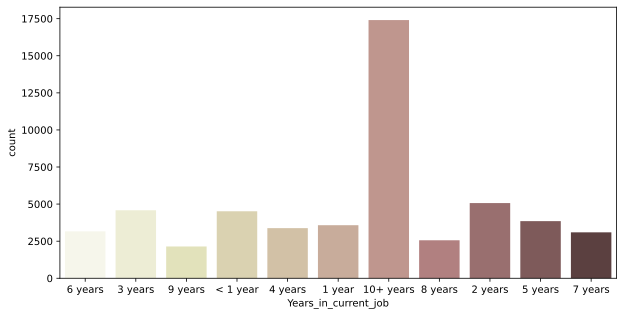

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(df_train['Years_in_current_job'], palette='pink_r');

In [49]:
df_train.isnull().sum()

In [50]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [51]:
df_train.isnull().sum()

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55608 entries, 0 to 80409
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_ID                    55608 non-null  object 
 1   Customer_ID                55608 non-null  object 
 2   Loan_Status                55608 non-null  object 
 3   Current_Loan_Amount        55608 non-null  float64
 4   Term                       55608 non-null  object 
 5   Credit_Score               55608 non-null  float64
 6   Annual_Income              55608 non-null  float64
 7   Years_in_current_job       55608 non-null  object 
 8   Home_Ownership             55608 non-null  object 
 9   Purpose                    55608 non-null  object 
 10  Monthly_Debt               55608 non-null  float64
 11  Years_of_Credit_History    55608 non-null  float64
 12  Number_of_Open_Accounts    55608 non-null  float64
 13  Number_of_Credit_Problems  55608 non-null  flo

In [53]:
bank_lone_train = pd.get_dummies(df_train, columns =['Term','Home_Ownership','Purpose','Loan_Status', 'Years_in_current_job'], drop_first=True) 
bank_lone_test = pd.get_dummies(df_test, columns =['Term','Home_Ownership','Purpose','Loan_Status' , 'Years_in_current_job'], drop_first=True) 

In [54]:
bank_lone_train.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Credit_Score',
       'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History',
       'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax_Liens', 'Term_Short Term', 'Home_Ownership_Home Mortgage',
       'Home_Ownership_Own Home', 'Home_Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_renewable_energy',
       'Purpose_small_business', 'Purpose_vacation', 'Purpose_wedding',
       'Loan_Status_Fully Paid', 'Years_in_current_job_10+ years',
       'Years_in_current_job_2 years', 'Years_in_current_job_3 years',
       'Years_in_current_job_4 years', 'Years_in_current_job_5 years',
       'Years_in_cu

In [55]:
df_train.corr()

Current_Loan_Amount 
 Credit_Score 
 Annual_Income 
 Monthly_Debt 
 Years_of_Credit_History 
 Number_of_Open_Accounts 
 Number_of_Credit_Problems 
 Current_Credit_Balance 
 Maximum_Open_Credit 
 Bankruptcies 
 Tax_Liens 
 
 
 
 
 Current_Loan_Amount 
 1.000000 
 -0.105117 
 0.015514 
 -0.008151 
 0.026922 
 0.001346 
 -0.004906 
 0.006711 
 -0.000827 
 -0.001934 
 -0.002628 
 
 
 Credit_Score 
 -0.105117 
 1.000000 
 -0.014864 
 -0.000472 
 -0.013054 
 0.006577 
 0.000285 
 -0.003221 
 -0.003941 
 -0.003473 
 0.006607 
 
 
 Annual_Income 
 0.015514 
 -0.014864 
 1.000000 
 0.459476 
 0.148069 
 0.137162 
 -0.014591 
 0.304946 
 0.042415 
 -0.045649 
 0.040754 
 
 
 Monthly_Debt 
 -0.008151 
 -0.000472 
 0.459476 
 1.000000 
 0.194691 
 0.407775 
 -0.051059 
 0.484890 
 0.041829 
 -0.076626 
 0.021754 
 
 
 Years_of_Credit_History 
 0.026922 
 -0.013054 
 0.148069 
 0.194691 
 1.000000 
 0.131483 
 0.058908 
 0.210841 
 0.029104 
 0.061631 
 0.017174 
 
 
 Number_of_Open_Accounts 
 0.001346 
 0.006577 
 0.137162 
 0.407775 
 0.131483 
 1.000000 
 -0.014407 
 0.234957 
 0.033140 
 -0.025860 
 0.007073 
 
 
 Number_of_Credit_Problems 
 -0.004906 
 0.000285 
 -0.014591 
 -0.051059 
 0.058908 
 -0.014407 
 1.000000 
 -0.110801 
 -0.011297 
 0.749409 
 0.589154 
 
 
 Current_Credit_Balance 
 0.006711 
 -0.003221 
 0.304946 
 0.484890 
 0.210841 
 0.234957 
 -0.110801 
 1.000000 
 0.136300 
 -0.124809 
 -0.011894 
 
 
 Maximum_Open_Credit 
 -0.000827 
 -0.003941 
 0.042415 
 0.041829 
 0.029104 
 0.033140 
 -0.011297 
 0.136300 
 1.000000 
 -0.015012 
 -0.000835 
 
 
 Bankruptcies 
 -0.001934 
 -0.003473 
 -0.045649 
 -0.076626 
 0.061631 
 -0.025860 
 0.749409 
 -0.124809 
 -0.015012 
 1.000000 
 0.041065 
 
 
 Tax_Liens 
 -0.002628 
 0.006607 
 0.040754 
 0.021754 
 0.017174 
 0.007073 
 0.589154 
 -0.011894 
 -0.000835 
 0.041065 
 1.000000

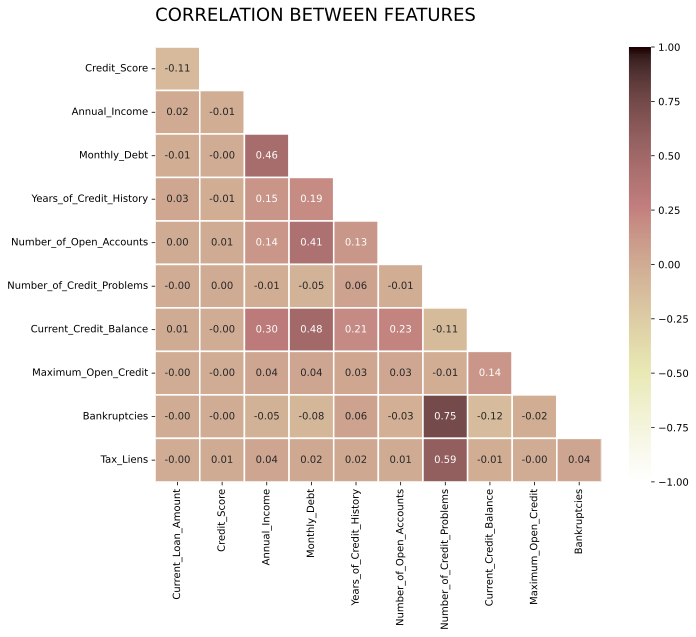

In [56]:
plt.figure(figsize=(10,8))
data_corr = df_train.corr()
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()
sns.heatmap(corr, cmap = 'pink_r', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f', mask=mask);
plt.title('CORRELATION BETWEEN FEATURES\n', loc='left', fontsize=18);

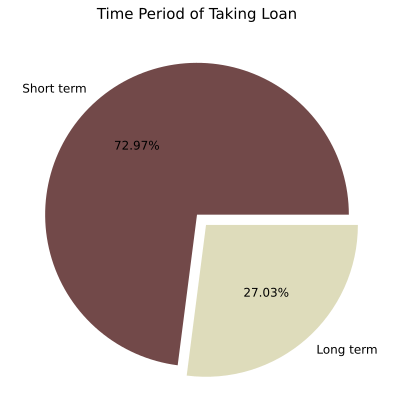

In [57]:
c = ['#724949','#cfa691', '#120f0f', '#a06868']
plt.figure(figsize=(7,7))
plt.pie(x = bank_lone_train['Term_Short Term'].value_counts(),
        labels=['Short term','Long term'],autopct='%.2f%%',
        textprops={'fontsize': 12},explode=[0,0.09], colors = ['#724949','#DEDCBB'])
plt.title('Time Period of Taking Loan',fontdict={'fontsize':15});

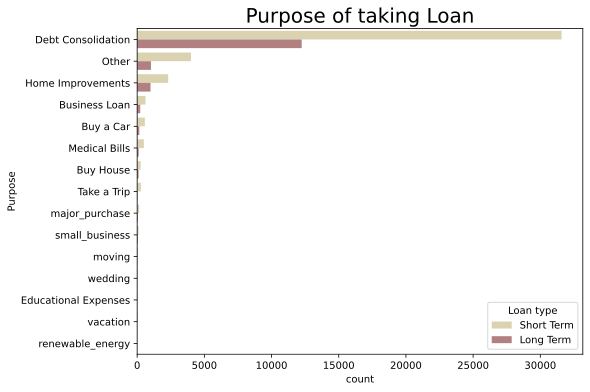

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(y='Purpose' , data=df_train, order = df_train['Purpose'].value_counts().index,
              hue='Term', palette = 'pink_r')
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="lower right");

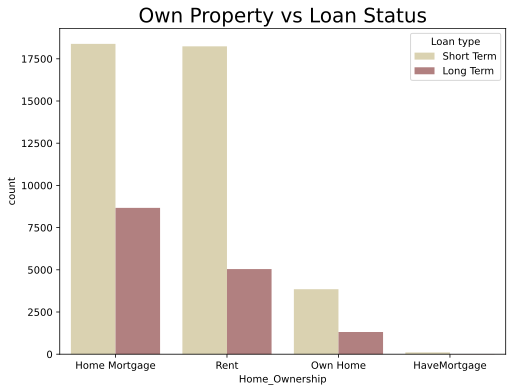

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(x='Home_Ownership',data=df_train ,order = df_train['Home_Ownership'].value_counts().index
              ,hue='Term',  palette = 'pink_r')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="upper right", labels=["Short Term","Long Term"]);

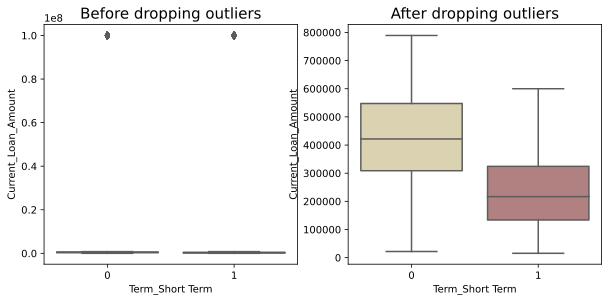

In [60]:
plt.figure(figsize = [10,15])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_lone_train = bank_lone_train[bank_lone_train['Current_Loan_Amount'] != 99999999]
bank_lone_train = bank_lone_train[((bank_lone_train['Current_Loan_Amount'] <= 600000 )
                                   & (bank_lone_train['Term_Short Term']==1))
                                  | (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );

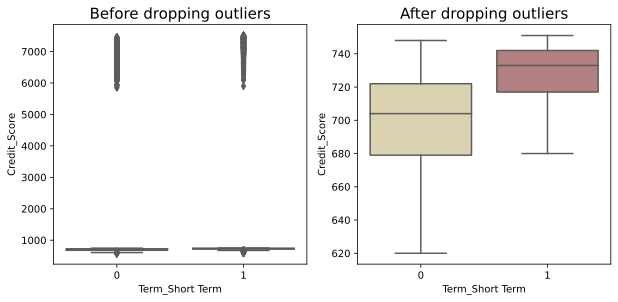

In [61]:
bank_lone_test = bank_lone_test[bank_lone_test['Current_Loan_Amount'] != 99999999]
bank_lone_test = bank_lone_test[((bank_lone_test['Current_Loan_Amount'] <= 600000 )
                                   & (bank_lone_test['Term_Short Term']==1))
                                  | (bank_lone_test['Term_Short Term']==0)]
plt.figure(figsize = [10,15])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Credit_Score',
            palette='pink_r', data = bank_lone_train.sort_values('Credit_Score',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_lone_train = bank_lone_train.loc[bank_lone_train['Credit_Score'] <= 1500,:]
bank_lone_train = bank_lone_train.loc[bank_lone_train['Credit_Score'] >= 620 ,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Credit_Score'] >= 680 )
                                   & (bank_lone_train['Term_Short Term']==1))| 
                                  (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Credit_Score',
            palette='pink_r', data = bank_lone_train.sort_values('Credit_Score',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );

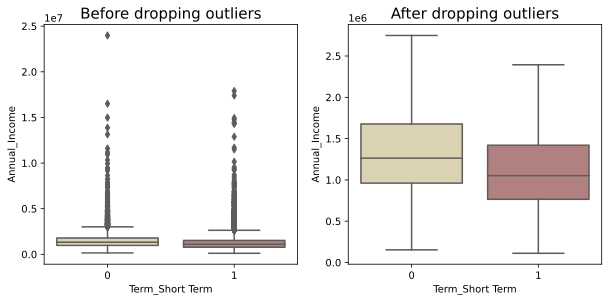

In [62]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Credit_Score'] <= 1500,:]
bank_lone_test = bank_lone_test.loc[bank_lone_test['Credit_Score'] >= 620 ,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Credit_Score'] >= 680 )
                                   & (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]
plt.figure(figsize = [10,15])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Annual_Income',
            palette='pink_r', data = bank_lone_train.sort_values('Annual_Income',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_lone_train = bank_lone_train.loc[bank_lone_train['Annual_Income'] <= 2750000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Annual_Income'] <= 2395000 )
                                   & (bank_lone_train['Term_Short Term']==1))
                                  | (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Annual_Income',
            palette='pink_r', data = bank_lone_train.sort_values('Annual_Income',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );

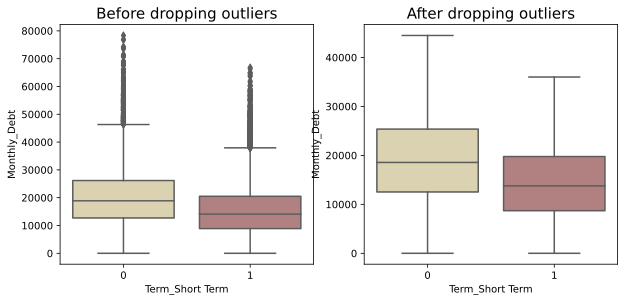

In [63]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Annual_Income'] <= 2750000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Annual_Income'] <= 2395000 )
                                   & (bank_lone_test['Term_Short Term']==1))
                                  | (bank_lone_test['Term_Short Term']==0)]
plt.figure(figsize = [10,15])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Monthly_Debt',
            palette='pink_r', data=bank_lone_train.sort_values('Monthly_Debt',ascending=False));
plt.title('Before dropping outliers',fontsize = 15)

bank_lone_train = bank_lone_train.loc[bank_lone_train['Monthly_Debt'] <= 44500,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Monthly_Debt'] <= 36000 )& (bank_lone_train['Term_Short Term']==1))| 
                                  (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Monthly_Debt',
            palette='pink_r', data=bank_lone_train.sort_values('Monthly_Debt',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );

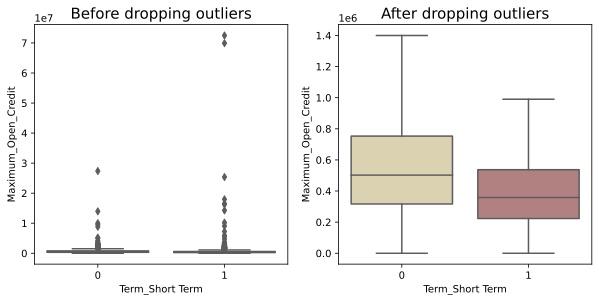

In [64]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Monthly_Debt'] <= 44500,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Monthly_Debt'] <= 36000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]
plt.figure(figsize = [10,15])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Credit_Balance',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Credit_Balance',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_lone_train = bank_lone_train.loc[bank_lone_train['Current_Credit_Balance'] <= 760000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Current_Credit_Balance'] <= 504000 )& 
                                   (bank_lone_train['Term_Short Term']==1))| (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Credit_Balance',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Credit_Balance',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );
bank_lone_test = bank_lone_test.loc[bank_lone_test['Current_Credit_Balance'] <= 760000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Current_Credit_Balance'] <= 504000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]
plt.figure(figsize = [10,15])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Maximum_Open_Credit',
            palette='pink_r', data=bank_lone_train.sort_values('Maximum_Open_Credit',ascending=False));
plt.title('Before dropping outliers',fontsize = 15)

bank_lone_train = bank_lone_train.loc[bank_lone_train['Maximum_Open_Credit'] <= 1400000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Maximum_Open_Credit'] <= 990000 )& 
                                   (bank_lone_train['Term_Short Term']==1))| (bank_lone_train['Term_Short Term']==0)]
plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Maximum_Open_Credit',
            palette='pink_r', data=bank_lone_train.sort_values('Maximum_Open_Credit',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );
bank_lone_test = bank_lone_test.loc[bank_lone_test['Maximum_Open_Credit'] <= 1400000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Maximum_Open_Credit'] <= 990000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

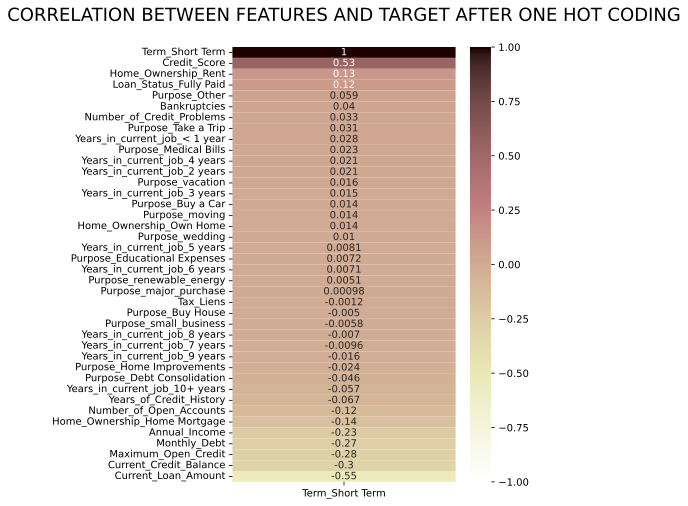

In [65]:
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(bank_lone_train.corr()[
    ['Term_Short Term']].sort_values(by='Term_Short Term',ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap = 'pink_r')
plt.title('CORRELATION BETWEEN FEATURES AND TARGET AFTER ONE HOT CODING\n', loc='center', fontsize=18);
X_train = bank_lone_train[['Current_Loan_Amount','Annual_Income','Monthly_Debt',
                          'Current_Credit_Balance', 'Tax_Liens', 
                          'Home_Ownership_Home Mortgage', 'Loan_Status_Fully Paid',
                          'Purpose_Buy House', 'Years_in_current_job_10+ years']]
y_train = bank_lone_train['Term_Short Term']
X_test = bank_lone_test[['Current_Loan_Amount','Annual_Income','Monthly_Debt',
                          'Current_Credit_Balance', 'Tax_Liens',
                          'Home_Ownership_Home Mortgage', 'Loan_Status_Fully Paid',
                          'Purpose_Buy House', 'Years_in_current_job_10+ years']]
y_test = bank_lone_test['Term_Short Term']

In [68]:
model = sm.OLS(y_train,X_train)
fit = model.fit()
fit.summary()

OLS Regression Results 
 
 Dep. Variable: Term_Short Term R-squared (uncentered): -85.007 
 
 
 Model: OLS Adj. R-squared (uncentered): -85.031 
 
 
 Method: Least Squares F-statistic: -3592. 
 
 
 Date: Mon, 10 Jan 2022 Prob (F-statistic): 1.00 
 
 
 Time: 01:49:30 Log-Likelihood: -23728. 
 
 
 No. Observations: 32713 AIC: 4.747e+04 
 
 
 Df Residuals: 32704 BIC: 4.755e+04 
 
 
 Df Model: 9 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Current_Loan_Amount -1.124e-06 2.15e-08 -52.215 0.000 -1.17e-06 -1.08e-06 
 
 
 Annual_Income 3.56e-07 6.92e-09 51.440 0.000 3.42e-07 3.7e-07 
 
 
 Monthly_Debt 4.75e-06 4.14e-07 11.464 0.000 3.94e-06 5.56e-06 
 
 
 Current_Credit_Balance 2.273e-07 2.35e-08 9.658 0.000 1.81e-07 2.73e-07 
 
 
 Tax_Liens 0.0269 0.011 2.489 0.013 0.006 0.048 
 
 
 Home_Ownership_Home Mortgage -0.0294 0.006 -5.042 0.000 -0.041 -0.018 
 
 
 Loan_Status_Fully Paid 0.4875 0.006 86.601 0.000 0.476 0.499 
 
 
 Purpose_Buy House 0.0961 0.036 2.685 0.007 0.026 0.166 
 
 
 Years_in_current_job_10+ years 0.0868 0.006 14.756 0.000 0.075 0.098 
 
 
 
 
 Omnibus: 1393.530 Durbin-Watson: 1.912 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 1407.169 
 
 
 Skew: -0.472 Prob(JB): 2.74e-306 
 
 
 Kurtosis: 2.627 Cond. No. 1.65e+07 
 
 Notes: [1] R² is computed without centering (uncentered) since the model does not contain a constant. [2] Standard Errors assume that the covariance matrix of the errors is correctly specified. [3] The condition number is large, 1.65e+07. This might indicate that there are strong multicollinearity or other numerical problems.

In [69]:
y_train.value_counts()

In [70]:
long_term_0 = bank_lone_train[bank_lone_train['Term_Short Term'] == 0]
short_term_1 = bank_lone_train[bank_lone_train['Term_Short Term'] == 1]# print the shape of the class
print('Long term 0:', long_term_0.shape[0])
print('Short term 1:', short_term_1.shape[0])

Long term 0: 9834
Short term 1: 22879


In [71]:
params = {'C': [0.001,0.01,0.1,1,10,100,1000], 'class_weight':[{0:0,0:0.01,0:0.1,0:0.5,0:1,0:10,0:2} ] }
lr_grid = GridSearchCV(LogisticRegression(), param_grid = params, scoring='f1', cv = 5)
lr_grid.fit(X_train, y_train)
print('\n Best param after grid search: ', lr_grid.best_params_ )
print(' Best f1_score for cross validation: ',lr_grid.best_score_ )

LR = LogisticRegression(C= 0.001 ,solver='liblinear')
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cr_f1 = cross_val_score(LR, X_train, y_train, scoring='f1', cv=kf)
print('\n Normal Logistic Regression Valdition F1: \n',cr_f1)
print('\n Mean Normal Logistic Regression Valdition F1: \n',cr_f1.mean())
print('--------------------------------')

lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
cr_balnced_f1 = cross_val_score(lr_balanced, X_train, y_train, scoring='f1', cv=kf)
print('\n Balanced class weights Logistic Regression Valdition F1: \n',cr_balnced_f1)
print('\n Mean Balanced class weights Logistic Regression Valdition F1: \n',cr_balnced_f1.mean())
print('--------------------------------')

lr_4x = LogisticRegression(C= 0.001, class_weight={0 : 2, 1 : 1}, solver='liblinear')
cr_weghts_f1 = cross_val_score(lr_4x, X_train, y_train, scoring='f1', cv=kf)
print('\n Class weights Logistic Regression Valdition F1: \n',cr_weghts_f1)
print('\n Mean Class weights Logistic Regression Valdition F1: \n',cr_weghts_f1.mean())
print('--------------------------------')

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              LogisticRegression(C= 0.001, solver='liblinear'))

imba_val = cross_val_score(imba_pipeline, X_train, y_train, scoring='f1', cv=kf)
print('\n Smote Logistic Regression Valdition F1: \n', imba_val)
print('\n Mean Smote Logistic Regression Valdition F1: \n', imba_val.mean())


 Best param after grid search:  {'C': 0.001, 'class_weight': {0: 2}}
 Best f1_score for cross validation:  0.7112175776815779

 Normal Logistic Regression Valdition F1: 
 [0.79642629 0.79843953 0.79413695 0.80564464 0.7969795  0.80403954
 0.80482551 0.79982688 0.78979503 0.80500972]

 Mean Normal Logistic Regression Valdition F1: 
 0.7995123587155655
--------------------------------

 Balanced class weights Logistic Regression Valdition F1: 
 [0.6880829  0.6787814  0.66847974 0.69425763 0.67302092 0.68958279
 0.69028871 0.66880171 0.67710583 0.67349138]

 Mean Balanced class weights Logistic Regression Valdition F1: 
 0.6801893006947453
--------------------------------

 Class weights Logistic Regression Valdition F1: 
 [0.72025723 0.71030427 0.70704445 0.7235     0.69744898 0.71995952
 0.72644836 0.70094653 0.7042108  0.70469799]

 Mean Class weights Logistic Regression Valdition F1: 
 0.7114818140140236
--------------------------------

 Smote Logistic Regression Valdition F1: 
 [0.

Default threshold:
Precision: 0.8184,   Recall: 0.5503


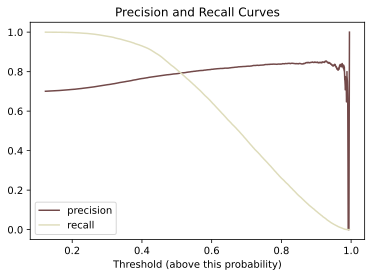

In [72]:
LR.fit(X_train, y_train)
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, LR.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');
y_predict = (LR.predict_proba(X_train)[:, 1] >= 0.65)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

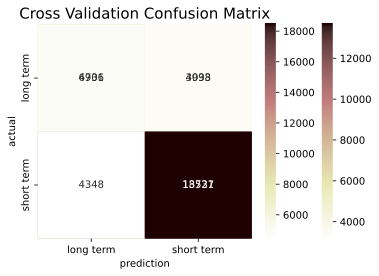

In [73]:
y_predict = (LR.predict_proba(X_train)[:, 1] >= 0.624)

loan_confusion = confusion_matrix(y_train, y_predict)

sns.heatmap(loan_confusion , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Train Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');
# confusion matrix for crossval
y_pred = cross_val_predict(LR, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [74]:
knn = KNeighborsClassifier(n_neighbors= 9)
k_range = list(range(3,11))
param_grd = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grd, scoring='f1', cv = 5)
grid.fit(X_train, y_train)
print('Best estimator: ', grid.best_estimator_ )
print('Best f1_score for cross validation: ',grid.best_score_ )

Best estimator:  KNeighborsClassifier(n_neighbors=9)
Best f1_score for cross validation:  0.8479863119702552


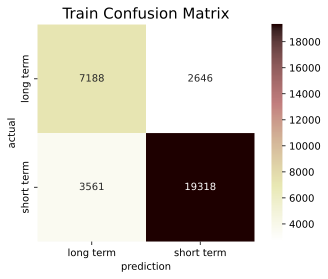

In [75]:
y_predict = (grid.predict_proba(X_train)[:, 1] >= 0.624)

loan_confusion = confusion_matrix(y_train, y_predict)

sns.heatmap(loan_confusion , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Train Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [76]:
Decision_Tree = DecisionTreeClassifier(max_depth = 8)
Decision_Tree.fit(X_train, y_train)
scores = cross_val_score(Decision_Tree, X_train, y_train, cv=5, scoring='f1')
print('Normal Decision Tree Valdition F1:',scores.mean())


dt_bal = DecisionTreeClassifier(max_depth = 8, class_weight='balanced')
dt_bal.fit(X_train, y_train)
scores = cross_val_score(dt_bal, X_train, y_train, cv=5, scoring='f1')
print('Balanced class weights Decision Tree Valdition F1:',scores.mean())


dt_wtd = DecisionTreeClassifier(class_weight= {0 : 10, 1 : 1})
scores = cross_val_score(dt_wtd, X_train, y_train, cv=5, scoring='f1')
dt_wtd.fit(X_train, y_train)
print('10:1 class weights Decision Tree Valdition F1:',scores.mean())


tree_param = {'criterion':['gini','entropy'],
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

gd_sr = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_param,scoring='f1',cv=5,n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print('\n Best param after grid search', best_parameters)
print('\n Best score after grid search', gd_sr.best_score_)

Normal Decision Tree Valdition F1: 0.8650578431736099
Balanced class weights Decision Tree Valdition F1: 0.801126732128368
10:1 class weights Decision Tree Valdition F1: 0.816279591193832

 Best param after grid search {'criterion': 'gini', 'max_depth': 6}

 Best score after grid search 0.8654974277441093


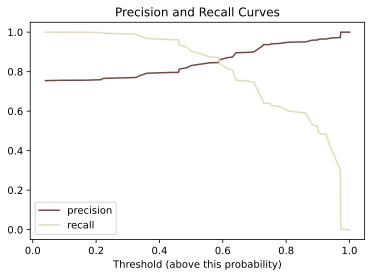

In [77]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, Decision_Tree.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

In [78]:
y_predict = (Decision_Tree.predict_proba(X_train)[:, 1] >= 0.5569)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.8308,   Recall: 0.9051


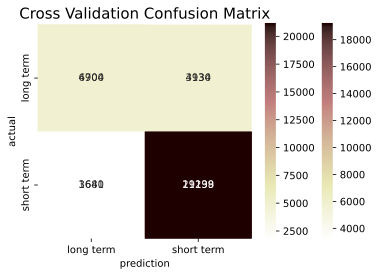

In [79]:
y_predict = (Decision_Tree.predict_proba(X_train)[:, 1] >= 0.61)

loan_confusion = confusion_matrix(y_train, y_predict)

sns.heatmap(loan_confusion , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Train Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');
# confusion matrix for crossval
y_pred = cross_val_predict(Decision_Tree, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [80]:
Random_Forest = RandomForestClassifier(n_estimators = 5, random_state=1)
Random_Forest.fit(X_train, y_train)
scores = cross_val_score(Random_Forest, X_train, y_train, cv=10, scoring='f1')
print('\n Normal Random Forest Valdition F1: \n',scores)
print('\n Mean Normal Random Forest Valdition F1:  \n',scores.mean())

rf_bal = RandomForestClassifier(n_estimators = 10, random_state=1, class_weight='balanced')
rf_bal.fit(X_train, y_train)
scores = cross_val_score(rf_bal, X_train, y_train, cv=10, scoring='f1')
print('\n Balanced class weights Random Forest Valdition F1: \n',scores)
print('\n Mean Balanced class weights Random Forest Valdition F1: \n',scores.mean())

rf_wtd = RandomForestClassifier(n_estimators = 10, random_state=1, class_weight= {0 : 2, 1 : 1})
rf_wtd.fit(X_train, y_train)
scores = cross_val_score(rf_wtd, X_train, y_train, cv=10, scoring='f1')
print('\n 2:1 class weights Random Forest Valdition F1:\n',scores)
print('\n 2:1 class weights Random Forest Valdition F1: \n',scores.mean())


 Normal Random Forest Valdition F1: 
 [0.84531683 0.84112937 0.84554918 0.84918307 0.84710392 0.84409179
 0.83138918 0.84007707 0.83936262 0.84820098]

 Mean Normal Random Forest Valdition F1:  
 0.8431404020117998

 Balanced class weights Random Forest Valdition F1: 
 [0.83955949 0.84613748 0.8429003  0.84911683 0.83687636 0.84422328
 0.83607979 0.84290358 0.84176394 0.86019667]

 Mean Balanced class weights Random Forest Valdition F1: 
 0.843975771296505

 2:1 class weights Random Forest Valdition F1:
 [0.84645161 0.84132055 0.84435798 0.84648188 0.84495453 0.8462867
 0.83971447 0.84323859 0.84       0.85916702]

 2:1 class weights Random Forest Valdition F1: 
 0.845197332966918


Default threshold:
Precision: 0.9957,   Recall: 0.9280


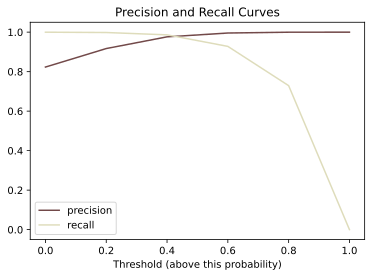

In [81]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, Random_Forest.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');
y_predict = (Random_Forest.predict_proba(X_train)[:, 1] >= 0.66)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

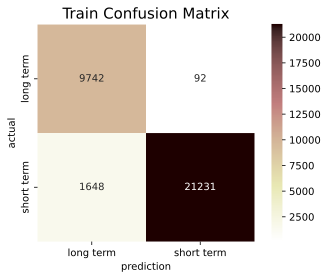

In [82]:
y_predict = (Random_Forest.predict_proba(X_train)[:, 1] >= 0.61)

loan_confusion = confusion_matrix(y_train, y_predict)

sns.heatmap(loan_confusion , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Train Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

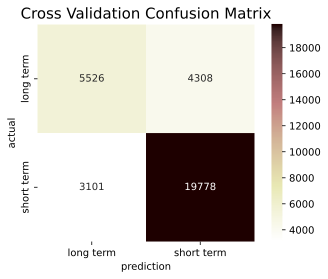

In [83]:
y_pred = cross_val_predict(Random_Forest, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [84]:
Extra_Tree = ExtraTreesClassifier()
Extra_Tree.fit(X_train, y_train)
scores = cross_val_score(Extra_Tree, X_train, y_train, cv =5, scoring = 'f1')
print('f1_scores for validation: ',scores)
print('Mean f1_score for validation: ',scores.mean())

f1_scores for validation:  [0.85427556 0.8601972  0.85139971 0.85299685 0.85986395]
Mean f1_score for validation:  0.8557466506636751


In [85]:
y_predict = (Extra_Tree.predict_proba(X_train)[:, 1] >= 0.1)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 1.0000,   Recall: 1.0000


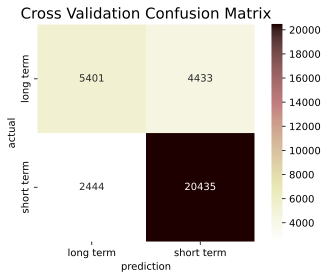

In [87]:
y_pred = cross_val_predict(Extra_Tree, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [88]:
lr = LogisticRegression() 
stacked = StackingClassifier(classifiers =[knn,Decision_Tree, lr], meta_classifier = lr, use_probas = False)
model_stack = stacked.fit(X_train, y_train)   # training of stacked model
accuracies = cross_val_score(estimator = model_stack, X = X_train, y = y_train, cv = 5, scoring='f1')
print('f1_score stacking for cross validation : ',accuracies)
print('Mean f1_score stacking for cross validation : ',accuracies.mean())

f1_score stacking for cross validation :  [0.84910379 0.85063025 0.84695838 0.84437467 0.85018144]
Mean f1_score stacking for cross validation :  0.8482497074513692
